Since the results of our study have been updated remarkably, some figures need to be modified.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#plt.style.use('ggplot')
plt.style.use('seaborn-paper')
#plt.style.use('seaborn-colorblind')
#plt.style.use('dark_background')
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['savefig.transparent'] = True


%matplotlib inline

import datetime
date = datetime.datetime.now().strftime('%Y%m%d')

# Check info in the case study

In [3]:
merge_df = pd.read_csv('data/spe+bulk_dataset_20210825.csv', index_col=0)

In [6]:
merge_df.loc[merge_df.core == 'PS75-056-1', 'TOC%'].agg(['max', 'min'])

max    0.323566
min    0.085389
Name: TOC%, dtype: float64

# Define the spectral range

In [8]:
range_df = merge_df.iloc[:, :2048].agg(['min', 'max'])
range_df

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.333333


In [11]:
range_df.index

Index(['min', 'max'], dtype='object')

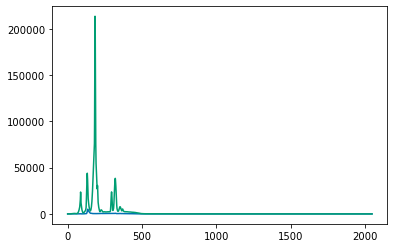

In [13]:
plt.plot(range(2048), range_df.loc['min', :])
plt.plot(range(2048), range_df.loc['max', :])

In [14]:
merge_df.iloc[:, :2048].describe()

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
count,2350.0,2350.0,2350.0,2350.0,2350.0,2350.0,2350.0,2350.0,2350.0,2350.0,...,2350.0,2350.0,2350.0,2350.0,2350.0,2350.0,2350.000000,2350.0,2350.0,2350.000000
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000213,0.0,0.0,0.000142
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.010314,0.0,0.0,0.006876
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.0,0.0,0.333333


In [15]:
merge_df.iloc[:, :2048].describe().to_csv('results/spectral_range_{}.csv'.format(date))
print(date)

20220104


## Plot the resolution difference

In [30]:
merge_df = pd.read_csv('data/spe+bulk_dataset_20210825.csv', index_col=0)
predict_df = pd.read_csv('results/predict_20220104.csv', index_col=0)

20220209


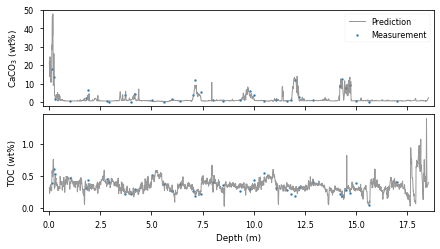

In [31]:
core = 'SO264-64-1'
fig, axes = plt.subplots(2, 1, figsize=(7, 3.7), sharex='col')

axes[0].plot(predict_df.loc[predict_df.core == core, 
    'composite_depth_mm']*.001, predict_df.loc[predict_df.core == core, 'CaCO3 prediction (wt%)'], 
    label='Prediction', alpha=.8, c='gray', lw=1)

axes[0].scatter(merge_df.loc[merge_df.core == core, 
    'mid_depth_mm']*.001, merge_df.loc[merge_df.core == core, 'CaCO3%'], 
    label='Measurement', s=4)
axes[0].set_ylabel('CaCO$_3$ (wt%)')
axes[0].set_xlim(-.3, 18.8)
axes[0].legend()

axes[1].plot(predict_df.loc[predict_df.core == core, 
    'composite_depth_mm']*.001, predict_df.loc[predict_df.core == core, 'TOC prediction (wt%)'], 
    label='Prediction', alpha=.8, c='gray', lw=1)
axes[1].scatter(merge_df.loc[merge_df.core == core, 
    'mid_depth_mm']*.001, merge_df.loc[merge_df.core == core, 'TOC%'], 
    label='Measurement', s=4)
axes[1].set_ylabel('TOC (wt%)')

axes[1].set_xlabel('Depth (m)')
fig.subplots_adjust(hspace=.08)
fig.savefig('results/prediction_{}_{}.png'.format(core, date))
print(date)

20220209


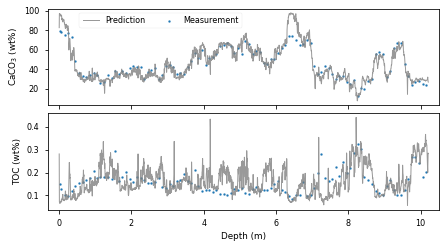

In [14]:
core = 'PS75-056-1'
fig, axes = plt.subplots(2, 1, figsize=(7, 3.7), sharex='col')

axes[0].plot(predict_df.loc[predict_df.core == core, 
    'composite_depth_mm']*.001, predict_df.loc[predict_df.core == core, 'CaCO3 prediction (wt%)'], 
    label='Prediction', alpha=.8, c='gray', lw=1)

axes[0].scatter(merge_df.loc[merge_df.core == core, 
    'mid_depth_mm']*.001, merge_df.loc[merge_df.core == core, 'CaCO3%'], 
    label='Measurement', s=4)
axes[0].set_ylabel('CaCO$_3$ (wt%)')
axes[0].set_xlim(-.3, 10.5)
axes[0].legend(ncol=2, loc=(.08, .8))

axes[1].plot(predict_df.loc[predict_df.core == core, 
    'composite_depth_mm']*.001, predict_df.loc[predict_df.core == core, 'TOC prediction (wt%)'], 
    label='Prediction', alpha=.8, c='gray', lw=1)
axes[1].scatter(merge_df.loc[merge_df.core == core, 
    'mid_depth_mm']*.001, merge_df.loc[merge_df.core == core, 'TOC%'], 
    label='Measurement', s=4)
axes[1].set_ylabel('TOC (wt%)')

axes[1].set_xlabel('Depth (m)')
fig.subplots_adjust(hspace=.08)
fig.savefig('results/prediction_{}_{}.png'.format(core, date))
print(date)

 # Data distribution
 It's modified from `build_models_08.ipynb` and adopt the case study codes from `build_models_09.ipynb`.

In [32]:
from nwp_cali import PrepareData
from sklearn.model_selection import train_test_split

y_train = {}
y_dev = {} 
core_train = {} 
core_dev = {}

for measurement in ['CaCO3%', 'TOC%']:
    print(measurement)
    prepare = PrepareData(measurement=measurement)
    data_df = prepare.select_data()
    y_train[measurement], y_dev[measurement], core_train[measurement], core_dev[measurement] = train_test_split(data_df[measurement], data_df.core, test_size = 0.2, shuffle = True, random_state = 24)
    print(len(y_train[measurement]), len(y_dev[measurement]))

CaCO3%
1488 372
TOC%
1573 394


In [33]:
case_df = pd.DataFrame()

for measurement in ['CaCO3%', 'TOC%']:
    prepare = PrepareData(measurement=measurement)
    data_df = prepare.select_casestudy(case_cores = ['PS75-056-1'])
    _, y = prepare.produce_Xy(data_df)
    case_df[measurement] = y


In [34]:
(~case_df['TOC%'].isna()).sum()

103

20220209


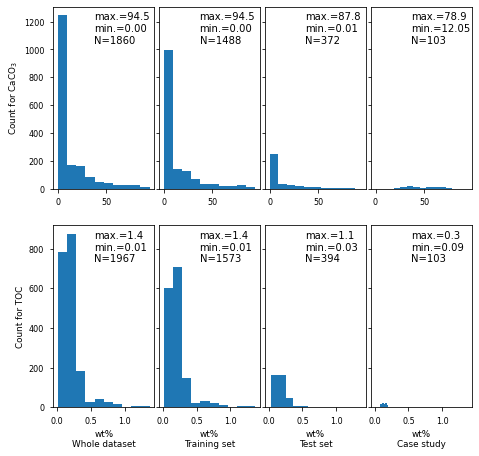

In [13]:
fig, axes = plt.subplots(2, 4, sharex='row', sharey='row', figsize=(7.5, 7))

# Here the dev set is marked as Test set on the figure due to the simplification
# in the paper    
for ax, y, label in zip(axes[0, :], [y_train['CaCO3%'].append(y_dev['CaCO3%']), 
                                     y_train['CaCO3%'], y_dev['CaCO3%'], case_df['CaCO3%']], 
                                    ['Whole dataset', 'Training set', 'Test set', 'Case study']):    
    ax.hist(y)
    ax.text(0.4, 0.8, "max.={:.1f}\nmin.={:.2f}\nN={}".format(
        np.max(y), np.min(y), len(y)), transform=ax.transAxes)

for ax, y, label in zip(axes[1, :], [y_train['TOC%'].append(y_dev['TOC%']), 
                                     y_train['TOC%'], y_dev['TOC%'], case_df['TOC%']], 
                                    ['Whole dataset', 'Training set', 'Test set', 'Case study']):
    ax.hist(y)
    ax.text(.4, .8, "max.={:.1f}\nmin.={:.2f}\nN={}".format(
        np.max(y), np.min(y), len(y)), transform=ax.transAxes)
    

    ax.set_xlabel('wt%\n{}'.format(label))

axes[0, 0].set_ylabel('Count for CaCO$_3$')
axes[1, 0].set_ylabel('Count for TOC')


fig.subplots_adjust(wspace=.05, top=.92)
fig.savefig('results/data_hist_{}.png'.format(date))
print(date)

# Performance on test set
Modified from `build_modes_09.ipynb`. To be mergerd with the result of case study, I transform it to horizontal.

In [35]:
y_df = pd.read_csv('results/y_dev_preds_20210823.csv', index_col=0)
y_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 393
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CaCO3%       372 non-null    float64
 1   CaCO3%_pred  372 non-null    float64
 2   TOC%         394 non-null    float64
 3   TOC%_pred    394 non-null    float64
dtypes: float64(4)
memory usage: 15.4 KB


20220209


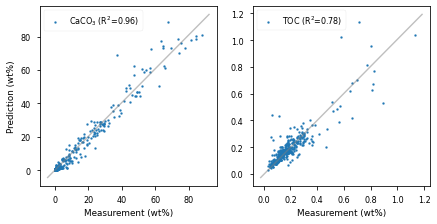

In [36]:
from sklearn.metrics import r2_score

fig, axes = plt.subplots(1, 2, figsize=(7, 3.7))

y = y_df['CaCO3%'].dropna()
y_pred = y_df['CaCO3%_pred'].dropna()

ind = np.argsort(y)
axes[0].scatter(y[ind], y_pred[ind], s=4, label='CaCO$_3$ (R$^2$={:.2f})'.format(r2_score(y, y_pred)))
axes[0].plot(axes[0].get_xlim(), axes[0].get_ylim(), alpha=.5, c='gray')
axes[0].set_ylabel('Prediction (wt%)')
axes[0].set_xlabel('Measurement (wt%)')
axes[0].legend(loc = 'upper left')
axes[0].set_aspect('equal')

y = y_df['TOC%'].dropna()
y_pred = y_df['TOC%_pred'].dropna()

ind = np.argsort(y)
axes[1].scatter(y[ind], y_pred[ind], s=4, label='TOC (R$^2$={:.2f})'.format(r2_score(y, y_pred)))
axes[1].plot(axes[1].get_xlim(), axes[1].get_ylim(), alpha=.5, c='gray')
axes[1].set_xlabel('Measurement (wt%)')
axes[1].legend(loc = 'upper left')
axes[1].set_aspect('equal')
#axes[1].set_yticks(np.linspace(0, 1.2, 5))

#fig.subplots_adjust(wspace=.3)
fig.savefig('results/performance_dev_{}.png'.format(date))
print(date)

# Evaluation of case study
Modified from `build_modes_09.ipynb`. Only core PS75-056-1 is needed.

In [37]:
from joblib import load
from  nwp_cali import PrepareData

measurement = 'CaCO3%'
model = load('models/{}_nmf+svr_model_20210823.joblib'.format(measurement[:-1].lower()))
prepare = PrepareData(measurement=measurement)
data_df = prepare.select_casestudy(case_cores = ['PS75-056-1'])
X, y = prepare.produce_Xy(data_df)

y_df = data_df[['core', 'mid_depth_mm']].copy()
y_df[measurement] = y
y_df['{}_pred'.format(measurement)] = np.exp(model.predict(X))

measurement = 'TOC%'
model = load('models/{}_nmf+svr_model_20210823.joblib'.format(measurement[:-1].lower()))
prepare = PrepareData(measurement=measurement)
data_df = prepare.select_casestudy(case_cores = ['PS75-056-1'])
X, y = prepare.produce_Xy(data_df)

y_df[measurement] = y
y_df['{}_pred'.format(measurement)] = np.exp(model.predict(X))

y_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103 entries, 0 to 102
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   core          103 non-null    object 
 1   mid_depth_mm  103 non-null    float64
 2   CaCO3%        103 non-null    float64
 3   CaCO3%_pred   103 non-null    float64
 4   TOC%          103 non-null    float64
 5   TOC%_pred     103 non-null    float64
dtypes: float64(5), object(1)
memory usage: 5.6+ KB


20220209


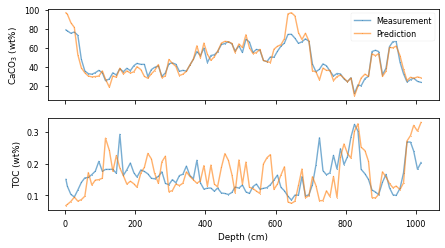

In [38]:
fig, axes = plt.subplots(2, 1,figsize=(7, 3.7), sharex='col')
for measurement, ax in zip(['CaCO3%', 'TOC%'], axes):
    y = y_df.loc[:, measurement].dropna()
    y_pred = y_df.loc[:, '{}_pred'.format(measurement)].dropna()
    
    ax.plot(y_df.loc[:, 'mid_depth_mm']*0.1, y, 
             marker='o', ms=1, alpha=0.6, label='Measurement')
    ax.plot(y_df.loc[:, 'mid_depth_mm']*0.1, y_pred,
             marker='o', ms=1, alpha=0.6, label='Prediction')
    if measurement == 'CaCO3%':
        ax.set_ylabel('CaCO$_3$ (wt%)')
    else:
        ax.set_ylabel('TOC (wt%)')
axes[1].set_xlabel('Depth (cm)')
axes[0].legend(loc='upper right')
plt.savefig('results/PS75-056-1_performances_{}.png'.format(date))
print(date)

In [21]:
# just curious if the logritm can make R2 beter look...
from sklearn.metrics import r2_score
print('CaCO3: {}'.format(r2_score(y_true=np.log(y_df['CaCO3%']), y_pred=np.log(y_df['CaCO3%_pred']))))
print('TOC: {}'.format(r2_score(y_true=np.log(y_df['TOC%']), y_pred=np.log(y_df['TOC%_pred']))))

CaCO3: 0.8711775960203758
TOC: -0.45733730291374997


# Draw spectrum example

In [2]:
merge_df = pd.read_csv('data/spe+bulk_dataset_20210825.csv', index_col=0)

20220108


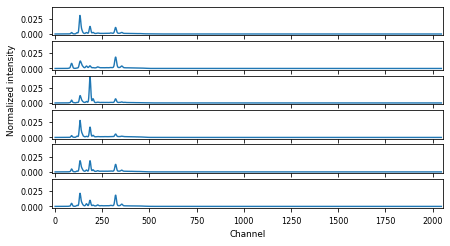

In [17]:
fig, axes = plt.subplots(6, 1,figsize=(7, 3.7), sharex='col', sharey='col')
for i, ax in enumerate(axes):
    spe = merge_df.iloc[i*50, :2048].values
    spe = spe/spe.sum()
    ax.plot(range(2048), spe)
ax.set_xlim(-15, 2055)
axes[2].set_ylabel('Normalized intensity')
axes[5].set_xlabel('Channel')

fig.savefig('results/spectrum_demo_{}.png'.format(date))
print(date)

# PCA and gridsearch result of pilot test
Modified from `pilot_test.ipnb` to combine the two plots (PCA and gridsearch).

In [2]:
grid_df = pd.concat([pd.read_csv('results/pilot_grid_ridge_20210823.csv', index_col=0),
                     pd.read_csv('results/pilot_grid_svr_20210318.csv', index_col=0),
                     pd.read_csv('results/pilot_grid_rf_20210822.csv', index_col=0)],
                    axis=0, join='outer')
grid_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 206 entries, 0 to 23
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   mean_fit_time           206 non-null    float64
 1   std_fit_time            206 non-null    float64
 2   mean_score_time         206 non-null    float64
 3   std_score_time          206 non-null    float64
 4   param_preprocessing     206 non-null    object 
 5   param_ridge__alpha      20 non-null     float64
 6   param_scaling           103 non-null    object 
 7   params                  206 non-null    object 
 8   split0_test_score       206 non-null    float64
 9   split1_test_score       206 non-null    float64
 10  split2_test_score       206 non-null    float64
 11  split3_test_score       206 non-null    float64
 12  split4_test_score       206 non-null    float64
 13  mean_test_score         206 non-null    float64
 14  std_test_score          206 non-null    flo

In [5]:
merge_df = pd.read_csv('data/spe+bulk_SO264-15-2.csv', index_col=0)
X = merge_df.iloc[:, : -5].values
X = X / X.sum(axis = 1, keepdims = True)

In [6]:
y = merge_df.caco3_percent.values

In [7]:
%%time
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pca = make_pipeline(StandardScaler(), PCA())
pca.fit(X)

CPU times: user 2.8 s, sys: 175 ms, total: 2.98 s
Wall time: 4.95 s


Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA())])

In [8]:
len(pca.named_steps['pca'].explained_variance_ratio_)

38

20220109


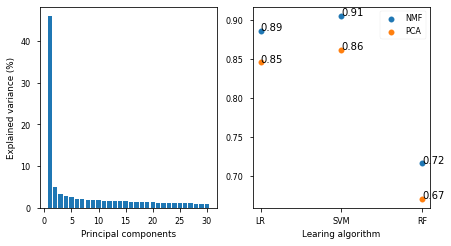

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(7, 3.7))
axes[0].bar([_ for _ in range(1, 31)], pca.named_steps['pca'].explained_variance_ratio_[:30]*100)
axes[0].set_xlabel('Principal components')
axes[0].set_ylabel('Explained variance (%)')

regrs = ['LR', 'SVM', 'RF']
for mask_scale, color, repre in zip([grid_df.param_scaling.isna(), ~grid_df.param_scaling.isna()], 
                                    ['C0', 'C1'], ['NMF', 'PCA']):
    scores = []
    for mask_reg in [~grid_df.param_ridge__alpha.isna(), 
                     ~grid_df.param_svr__C.isna(), 
                     ~grid_df.param_rf__max_depth.isna()]:
         scores.append(grid_df.loc[mask_scale & mask_reg, 'mean_test_score'].max())
    axes[1].scatter(regrs, scores, c=color, label=repre)
    for x, y in zip(regrs, scores):
        axes[1].text(x=x, y=y, s='{:.2f}'.format(y))
axes[1].legend()
axes[1].set_xlabel('Learing algorithm')
fig.savefig('results/pilot_pca+grid_compile_{}.png'.format(date))
print(date)

# Plot part of the grid search result
Modified from `build_models_09.ipynb`.

In [4]:
def n_scores(df):
    scores = []
    for n in np.unique(df.param_nmf__n_components):
        data = df[df.param_nmf__n_components == n]
        max_score = data.mean_test_score.max()
        scores = np.hstack((scores, 
                            data.loc[data.mean_test_score == max_score, 'mean_test_score'].values))
    return scores

## CaCO3

In [15]:
caco3_df = pd.concat([pd.read_csv('results/caco3_grid_nmf+svr_20210820.csv', index_col=0),
                      pd.read_csv('results/caco3_grid_nmf+svr_20210823.csv', index_col=0),
                      pd.read_csv('results/caco3_grid_nmf+svr_1_20210823.csv', index_col=0),
                      pd.read_csv('results/caco3_grid_nmf+svr_2-1_20210823.csv', index_col=0),
                      pd.read_csv('results/caco3_grid_nmf+svr_2-2_20210823.csv', index_col=0)],
                     axis=0, join='inner').reset_index(drop=True)
caco3_df.shape

(349, 21)

20220109


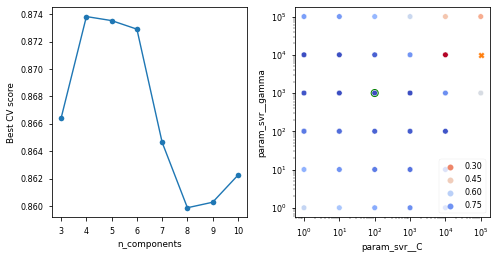

In [16]:
df = caco3_df[caco3_df.param_nmf__n_components == 4].reset_index(drop=True)

fig, axes = plt.subplots(1, 2, figsize=(7, 3.7))
# component plot
axes[0].plot(np.unique(caco3_df.param_nmf__n_components), n_scores(caco3_df), marker='o')
axes[0].set_xlabel('n_components')
axes[0].set_ylabel('Best CV score')

# SVM plot
# plot the positive scores
sns.scatterplot(data=df[df.mean_test_score > 0], x='param_svr__C', y='param_svr__gamma', 
                hue='mean_test_score', palette='coolwarm_r', ax=axes[1])
# plot the negative scores
axes[1].scatter(x=df.loc[df.mean_test_score < 0, 'param_svr__C'], 
            y=df.loc[df.mean_test_score < 0, 'param_svr__gamma'],
            marker='X')
# mark the best score
test_max = np.argmax(df.mean_test_score)
axes[1].scatter(df.param_svr__C[test_max], df.param_svr__gamma[test_max], 
            edgecolors='green', facecolors='none', linewidths=1, s=50)
axes[1].set_xscale('log')
axes[1].set_yscale('log')
axes[1].legend()

plt.tight_layout()
plt.savefig('results/caco3_grid_4nmf+svr_{}.png'.format(date))
print(date)

## TOC

In [2]:
toc_df = pd.concat([pd.read_csv('results/toc_grid_nmf+svr_20210821.csv', index_col=0),
                    pd.read_csv('results/toc_grid_nmf+svr_20210822.csv', index_col=0),
                    pd.read_csv('results/toc_grid_nmf+svr_20210823.csv', index_col=0),
                    pd.read_csv('results/toc_grid_nmf+svr_2_20210823.csv', index_col=0)],
                   axis=0, join='inner').reset_index(drop=True)
toc_df.shape

(408, 21)

20220109


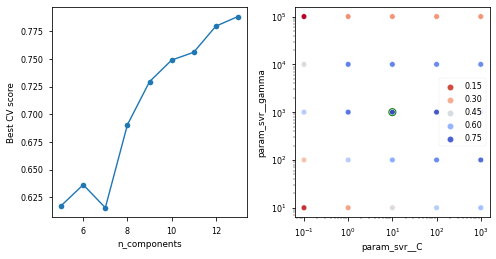

In [14]:
df = toc_df[toc_df.param_nmf__n_components == 13].reset_index(drop=True)

fig, axes = plt.subplots(1, 2, figsize=(7, 3.7))
# component plot
axes[0].plot(np.unique(toc_df.param_nmf__n_components), n_scores(toc_df), marker='o')
axes[0].set_xlabel('n_components')
axes[0].set_ylabel('Best CV score')

# SVM plot
# plot the positive scores
sns.scatterplot(data=df[df.mean_test_score > 0], x='param_svr__C', y='param_svr__gamma', 
                hue='mean_test_score', palette='coolwarm_r', ax=axes[1])
# plot the negative scores
axes[1].scatter(x=df.loc[df.mean_test_score < 0, 'param_svr__C'], 
            y=df.loc[df.mean_test_score < 0, 'param_svr__gamma'],
            marker='X')
# mark the best score
test_max = np.argmax(df.mean_test_score)
axes[1].scatter(df.param_svr__C[test_max], df.param_svr__gamma[test_max], 
            edgecolors='green', facecolors='none', linewidths=1, s=50)
axes[1].set_xscale('log')
axes[1].set_yscale('log')
axes[1].legend()

plt.tight_layout()
plt.savefig('results/toc_grid_13nmf+svr_{}.png'.format(date))
print(date)